In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

filepath = '/home/disk/sipn/mcmcgraw/data/VRILE/intermediate_data/'
model_name = 'ecmwfsipn'
model_type = 'reforecast'
day_change = 5
max_lead = 30

filename = '{model_name}_{model_type}_d_SIC_{day_change}day_change_lead_time_{max_lead}days_ALL_REGIONS_ALL_ENS.csv'.format(model_name=model_name,
                                                                                                                                 model_type=model_type,
                                                                                                                                 day_change=day_change,
                                                                                                                                 max_lead=max_lead)
#

/home/disk/sipn/mcmcgraw/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/disk/sipn/mcmcgraw/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


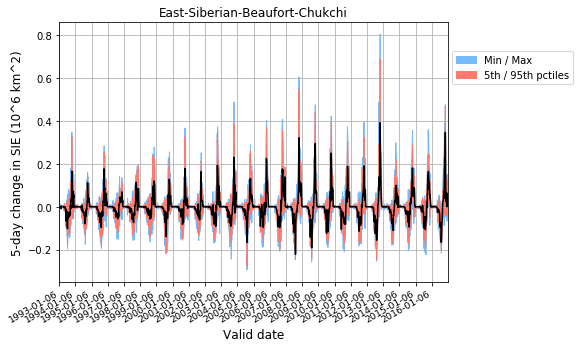

In [2]:
ds_SIC_all = pd.read_csv(filepath+filename)
regions = ds_SIC_all['region'].unique().tolist() #list unique regions
valid_dates = ds_SIC_all['V (valid date)'].unique().tolist() #list valid dates
#print(valid_dates[0::72])
#print(np.arange(0,len(valid_dates),72))
ds_regions = ds_SIC_all.groupby(['region'])
#ds_region = ds_SIC_all['d_SIC (V - I)'].where(ds_SIC_all['region']==regions[1])
ds_regions.groups
region_ind = 5
region_name = regions[region_ind]
fart = ds_regions.get_group(region_name)
ds_val = fart.groupby(['V (valid date)'])
ds_val_mean = fart.groupby(['V (valid date)']).mean()
ds_val_min = fart.groupby(['V (valid date)']).min()
ds_val_max = fart.groupby(['V (valid date)']).max()
ds_val_5th = fart.groupby(['V (valid date)']).quantile(.05)
ds_val_95th = fart.groupby(['V (valid date)']).quantile(.95)
ds_val_mean
#plt.plot(ds_val_mean['d_SIC (V - I)'].values)
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1,0.1,0.9,0.9])
ax1.grid(True)
minmax = ax1.fill_between(np.arange(0,len(ds_val_mean)),ds_val_min['d_SIC (V - I)'].values,ds_val_max['d_SIC (V - I)'].values,color='xkcd:sky blue')
ptiles = ax1.fill_between(np.arange(0,len(ds_val_mean)),ds_val_5th['d_SIC (V - I)'].values,ds_val_95th['d_SIC (V - I)'].values,color='xkcd:salmon')
meanvals = ax1.plot(ds_val_mean['d_SIC (V - I)'].values,'k')
ax1.set_xlim([0,len(valid_dates)])
ax1.set_xticks(np.arange(0,len(valid_dates),72))
ax1.set_xticklabels(valid_dates[0::72],rotation=30,ha='right',position=(0,0),fontsize=9.5)
ax1.set_xlabel('Valid date',fontsize=12)
ax1.set_ylabel('5-day change in SIE (10^6 km^2)',fontsize=12)
ax1.set_title(region_name)
ax1.legend((minmax,ptiles),('Min / Max','5th / 95th pctiles'),bbox_to_anchor=(1.335,0.91))


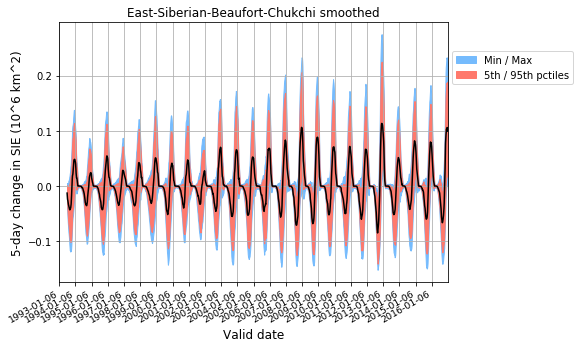

In [3]:
#valid_dates[0:18]
rolling_interval = 18*1 #18: about 3 months
mean_smooth = ds_val_mean.rolling(rolling_interval).mean()
#mean_smooth
#ds_val_mean
fig2 = plt.figure()
ax2 = fig2.add_axes([0.1,0.1,0.9,0.9])
ax2.grid(True)
s_minmax = ax2.fill_between(np.arange(0,len(ds_val_mean)),ds_val_min['d_SIC (V - I)'].rolling(rolling_interval).mean(),ds_val_max['d_SIC (V - I)'].rolling(rolling_interval).mean(),color='xkcd:sky blue')
s_ptiles = ax2.fill_between(np.arange(0,len(ds_val_mean)),ds_val_5th['d_SIC (V - I)'].rolling(rolling_interval).mean(),ds_val_95th['d_SIC (V - I)'].rolling(rolling_interval).mean(),color='xkcd:salmon')
ax2.plot(mean_smooth['d_SIC (V - I)'].values,'k')
ax2.set_xlim([0,len(valid_dates)])
ax2.set_xticks(np.arange(0,len(valid_dates),72))
ax2.set_xticklabels(valid_dates[0::72],rotation=30,ha='right',position=(0,0),fontsize=9.5)
ax2.set_xlabel('Valid date',fontsize=12)
ax2.set_ylabel('5-day change in SIE (10^6 km^2)',fontsize=12)
ax2.set_title(region_name+' smoothed')
ax2.legend((s_minmax,s_ptiles),('Min / Max','5th / 95th pctiles'),bbox_to_anchor=(1.335,0.91))

East-Siberian-Beaufort-Chukchi


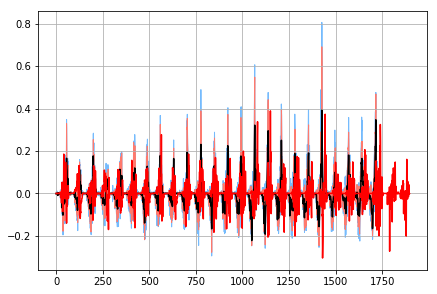

In [4]:
##OBS
region_names_obs = ['panArctic','EastGreenlandSea','BarentsSea','CentralArctic',
                'Kara-Laptev','East-Siberian-Beaufort-Chukchi']
filepath_obs = '/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/OBS/'  #observed sea ice extent data
##open_mfdataset(foo+'/*.nc') opens all nc files in specific directory
#init_date_ALL = pd.to_datetime(ds_SIC_all['I (init date)'])
#valid_date_ALL = pd.to_datetime(ds_SIC_all['V (valid date)'])
fname_time_obs = 'NSIDC_SIE_delta_TIME_5day_change_ALL_NO_dt.csv'
time_obs = pd.read_csv(filepath_obs+fname_time_obs)
obs_year = time_obs['year']
#print(time_obs[1461::5])
obs_month = time_obs['month']
print(region_names_obs[region_ind])
fname_obs = 'NSIDC_SIE_delta_{day_change}day_change_{region}_ALL_NO_dt.txt'.format(day_change=day_change,
                             region=region_names_obs[region_ind])
SIC_obs = pd.read_csv(filepath_obs+fname_obs)
#
mon_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
SIC_obs_p5 = pd.DataFrame(columns=mon_names)
for xmon in np.arange(1,13):        
        obs_sel_ind = obs_month.index.where(obs_month == xmon)
        obs_sel_ind = obs_sel_ind[0:-5]
        d_SIC_obs_sel = SIC_obs[~np.isnan(obs_sel_ind)]
        d_SIC_obs_sel = d_SIC_obs_sel - np.nanmean(d_SIC_obs_sel)
        p5_obs = np.nanpercentile(d_SIC_obs_sel,5)
        xmon_name = mon_names[xmon-1]
        SIC_obs_p5.loc[xmon_name] = p5_obs
        #SIC_obs_p5.loc['Region'] = region_names[xreg]
        
SIC_obs_smooth = SIC_obs.rolling(30).mean()
fig3 = plt.figure()
ax3 = fig3.add_axes([0.1,0.1,0.9,0.9])
ax3.grid(True)
ax3.fill_between(np.arange(0,len(ds_val_mean)),ds_val_min['d_SIC (V - I)'].values,ds_val_max['d_SIC (V - I)'].values,color='xkcd:sky blue')
ax3.fill_between(np.arange(0,len(ds_val_mean)),ds_val_5th['d_SIC (V - I)'].values,ds_val_95th['d_SIC (V - I)'].values,color='xkcd:salmon')
ax3.plot(ds_val_mean['d_SIC (V - I)'].values,'k')
ax3.plot(np.arange(0,len(SIC_obs[1466::5])),SIC_obs[1466::5],'r')

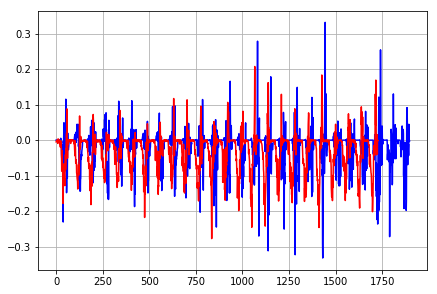

In [5]:
p5_timeser = SIC_obs.rolling(5).quantile(0.05)
fig4 = plt.figure()
ax4 = fig4.add_axes([0.1,0.1,0.9,0.9])
ax4.grid(True)
ax4.plot(np.arange(0,len(SIC_obs[1466::5])),p5_timeser[1466::5],'b')
ax4.plot(np.arange(0,len(ds_val_mean)),ds_val_5th['d_SIC (V - I)'],'r')

In [6]:
#print(time_obs[1466::5])
#print(valid_dates)
#print(np.corrcoef(p5_timeser[1466::5],ds_val_5th['d_SIC (V - I)']))